# Logarithm transformation

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# for Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import FunctionTransformer

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# Plot histogram and Q-Q plots to explore the variable distribution


def diagnostic_plots(df, variable):

    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable

    plt.figure(figsize=(15, 6))

    # histogram
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(f"Histogram of {variable}")

    # q-q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {variable}")

    plt.show()

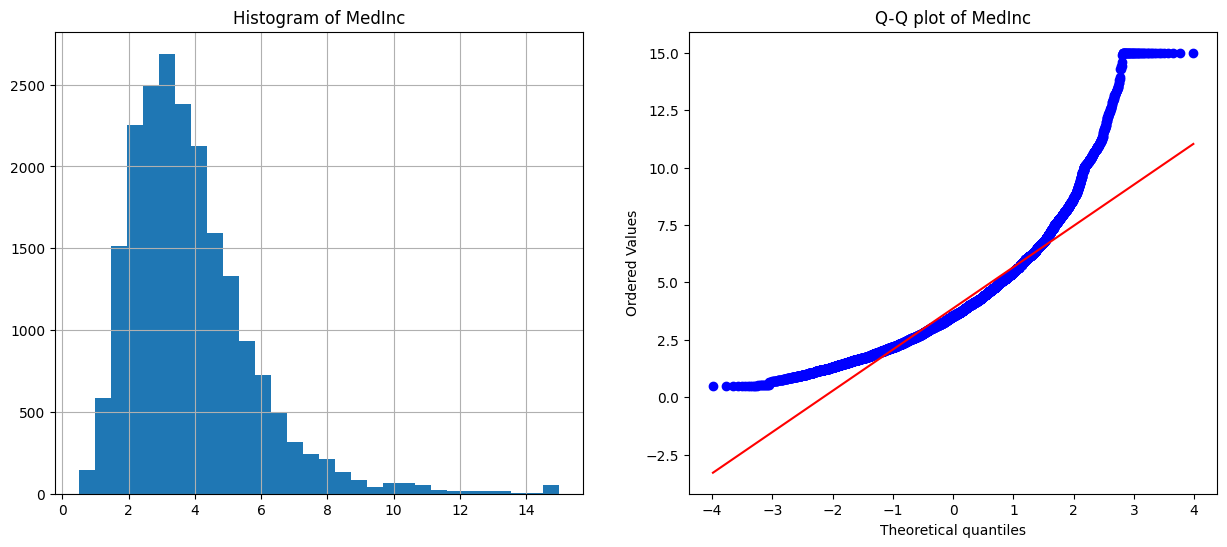

In [4]:
# Check function output

diagnostic_plots(X, "MedInc")

In [5]:
# list with the variables to transform

variables = ["MedInc", "AveRooms", "AveBedrms", "Population"]

# Logarithmic transformation with Scikit-learn

In [6]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

In [7]:
# set up the transformer with NumPy log as parameter

transformer = FunctionTransformer(func=np.log, inverse_func=np.exp)

In [8]:
# transform subset of dataframe (remember that we
# made a copy earlier.)

X_tf[variables] = transformer.transform(X[variables])

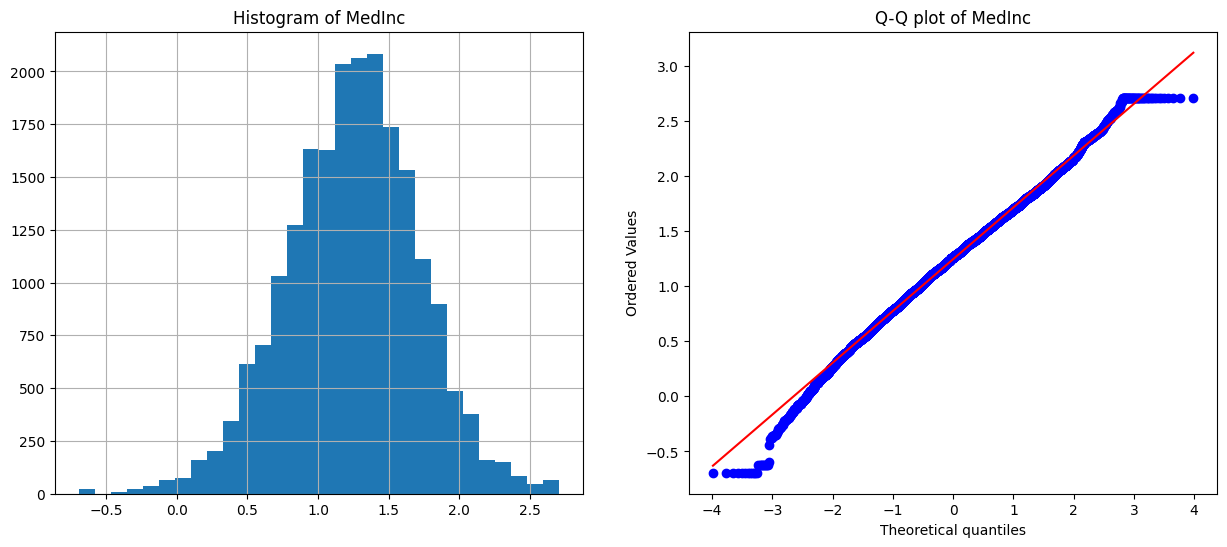

In [9]:
# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "MedInc")

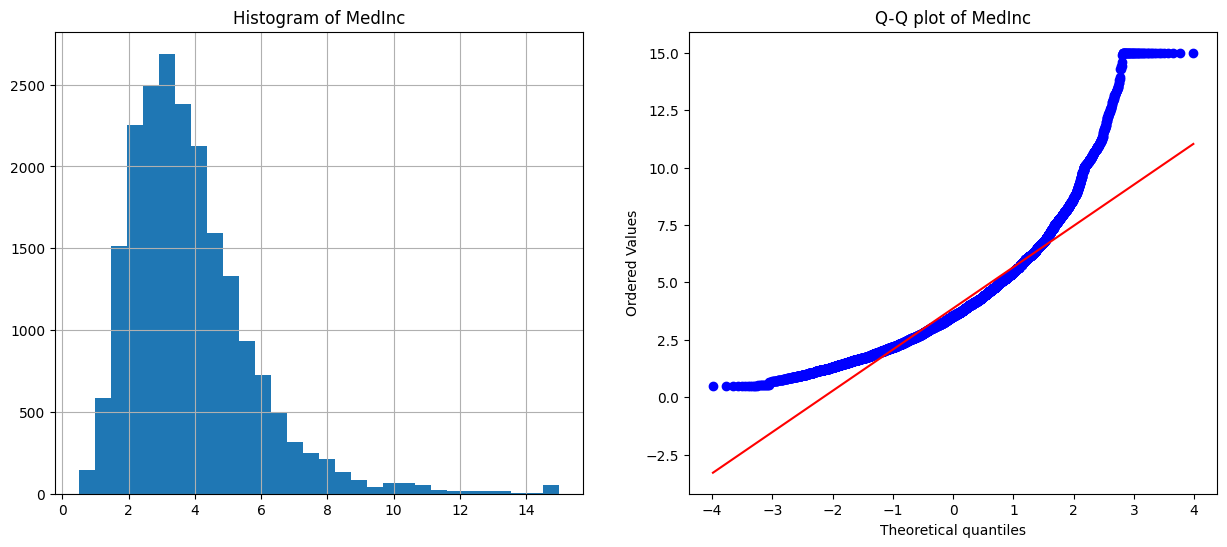

In [10]:
# revert to the original representation

X_tf[variables] = transformer.inverse_transform(X_tf[variables])

diagnostic_plots(X_tf, "MedInc")

# Logarithm plus constant

If you want to add a constant to the variables, say because some of their values are 0 or negative, this is how to do it.

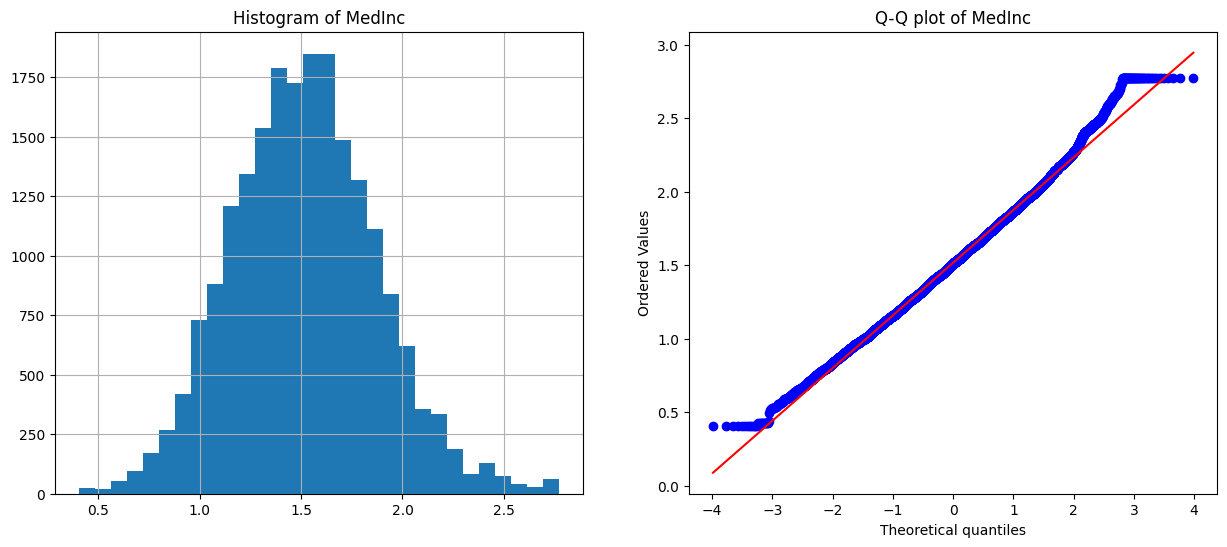

In [11]:
# make a copy of the dataframe where we will store the modified
# variables

X_tf = X.copy()

# set up the transformer

transformer = FunctionTransformer(lambda x: np.log(x + 1))

# transform subset of dataframe

X_tf[variables] = transformer.transform(X[variables])

# use diagnostic plot function to corroborate variable transformation

diagnostic_plots(X_tf, "MedInc")